# Prática Independente: Feature Engineering e validação de modelos.

### Feature Engineering.

#### Exercício 1: Acesse o link com a [lista das montanhas mais altas do mundo](https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth) e crie um dicionário para as cinco primeiras, em termos de altura, contendo dados sobre `Mountain`, `Height`, `First Ascent` e `Country`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

In [2]:
dados= {'mountain': ['Everest', 'K2', 'Kangchenjunga', 'Lhotse', 'Makalu'], 
        'height': [8.848, 8.611, 8.586, 8.516, 8.485], 
        'first_ascent': [1953, 1954, 1955, 1956, 1955], 
        'country': ['China', 'China', 'India', 'China', 'China']}

df= pd.DataFrame(dados, columns= dados.keys())
df.head()

,mountain,height,first_ascent,country
0,Everest,8.848,1953,China
1,K2,8.611,1954,China
2,Kangchenjunga,8.586,1955,India
3,Lhotse,8.516,1956,China
4,Makalu,8.485,1955,China


#### Exercício 2: Aplique a técnica `one hot-encoding` à lista de dicionários recém criados, para gerar a "dummiezação" das variáveis categóricas.

In [3]:
#Usando função get_dummies do pandas

df_dummies= pd.get_dummies(df)
df_dummies

,height,first_ascent,mountain_Everest,mountain_K2,mountain_Kangchenjunga,mountain_Lhotse,mountain_Makalu,country_China,country_India
0,8.848,1953,1,0,0,0,0,1,0
1,8.611,1954,0,1,0,0,0,1,0
2,8.586,1955,0,0,1,0,0,0,1
3,8.516,1956,0,0,0,1,0,1,0
4,8.485,1955,0,0,0,0,1,1,0


In [4]:
df_copy= df.copy()

#Usando label encoder do SkLearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_copy['mountain']= le.fit_transform(df['mountain'])
df_copy['country']= le.fit_transform(df['country'])

#### Exercício 3: Recupere os nomes dos atributos "dummiezados" e os inspecione.

In [5]:
print(df['mountain'].unique(), df_copy['mountain'].unique(), sep= '------>')
print()
print(df['country'].unique(), df_copy['country'].unique(), sep= '------>')

['Everest' 'K2' 'Kangchenjunga' 'Lhotse' 'Makalu']------>[0 1 2 3 4]

['China' 'India']------>[0 1]


In [6]:
df_copy.describe()

,mountain,height,first_ascent,country
count,5.000000,5.000000,5.000000,5.000000
mean,2.000000,8.609200,1954.600000,0.200000
std,1.581139,0.142898,1.140175,0.447214
min,0.000000,8.485000,1953.000000,0.000000
25%,1.000000,8.516000,1954.000000,0.000000
50%,2.000000,8.586000,1955.000000,0.000000
75%,3.000000,8.611000,1955.000000,0.000000
max,4.000000,8.848000,1956.000000,1.000000


#### Exercício 4: Calcule a matriz esparsa dos dados.

In [7]:
from scipy.sparse import csr_matrix
matriz_esparsa= csr_matrix(df_copy).toarray()

matriz_esparsa

array([[0.000e+00, 8.848e+00, 1.953e+03, 0.000e+00],
       [1.000e+00, 8.611e+00, 1.954e+03, 0.000e+00],
       [2.000e+00, 8.586e+00, 1.955e+03, 1.000e+00],
       [3.000e+00, 8.516e+00, 1.956e+03, 0.000e+00],
       [4.000e+00, 8.485e+00, 1.955e+03, 0.000e+00]])

### Validação de modelos.

#### Exercício 5: A partir das definições a seguir, construa a validação dos modelos a serem aplicados para ajustar os pontos criados.

In [8]:
def make_data(N, err = 1.0, rseed = 1):
    '''
    randomly sample the data 
    '''
    rng = np.random.RandomState(rseed)
    
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
print(X)
print(X.ravel())

[[1.73907352e-01]
 [5.18867376e-01]
 [1.30815988e-08]
 [9.14049845e-02]
 [2.15372915e-02]
 [8.52641608e-03]
 [3.46928663e-02]
 [1.19412216e-01]
 [1.57424429e-01]
 [2.90323473e-01]
 [1.75724041e-01]
 [4.69525764e-01]
 [4.18007224e-02]
 [7.71090232e-01]
 [7.50080261e-04]
 [4.49526682e-01]
 [1.74143298e-01]
 [3.12134324e-01]
 [1.97084925e-02]
 [3.92442000e-02]
 [6.41191864e-01]
 [9.37530479e-01]
 [9.82347155e-02]
 [4.79310604e-01]
 [7.68057946e-01]
 [8.00321082e-01]
 [7.23251789e-03]
 [1.52527609e-03]
 [2.88423714e-02]
 [7.71134256e-01]
 [9.67209972e-03]
 [1.77331632e-01]
 [9.17552352e-01]
 [2.84265221e-01]
 [4.78693941e-01]
 [9.95501134e-02]
 [4.71283524e-01]
 [6.96600012e-01]
 [3.34461088e-04]
 [5.62716493e-01]]
[1.73907352e-01 5.18867376e-01 1.30815988e-08 9.14049845e-02
 2.15372915e-02 8.52641608e-03 3.46928663e-02 1.19412216e-01
 1.57424429e-01 2.90323473e-01 1.75724041e-01 4.69525764e-01
 4.18007224e-02 7.71090232e-01 7.50080261e-04 4.49526682e-01
 1.74143298e-01 3.12134324e-01 1.97

In [55]:
X_test = np.linspace(1.0, 8.8, 500).reshape(-1,1)
X_test[:5]

array([[1.        ],
       [1.01563126],
       [1.03126253],
       [1.04689379],
       [1.06252505]])

In [11]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs)
                        )

#### Exercício 5 (continuação): Teste os graus `[1, 3, 5, 7, 9]` para os pontos gerados.

/home/fabiano/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass param_name=polynomialfeatures__degree as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


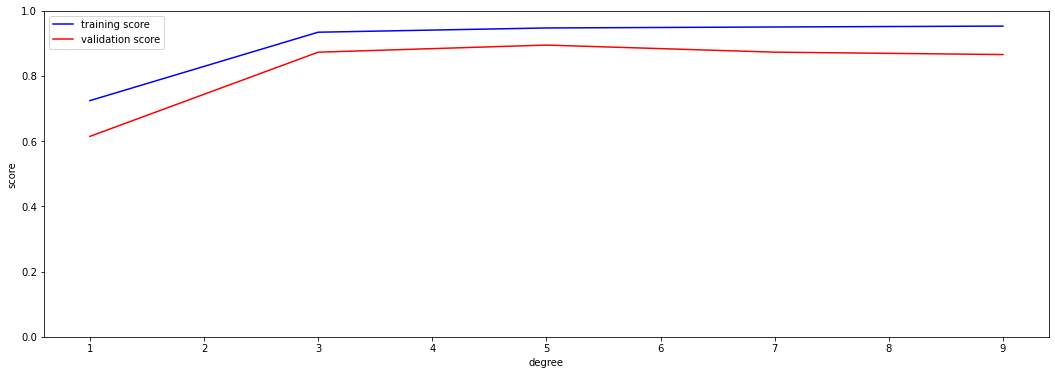

In [16]:
degree = [1, 3, 5, 7, 9]

train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          param_range = degree, 
                                          cv = 5
                                         )
plt.figure( figsize = (18, 6))
plt.plot(degree, 
         np.mean(train_score, axis = 1), 
         color = 'blue', 
         label = 'training score'
        )
plt.plot(degree, 
         np.mean(val_score, axis = 1), 
         color = 'red', 
         label = 'validation score'
        )
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

#### Exercício 5 (continuação): Escolha o grau que melhor ajusta a regressão aos pontos.

In [17]:
np.max(val_score)

0.9714613417423948

#### Exercício 5 (continuação): Plote os pontos gerados e a curva de ajuste final.

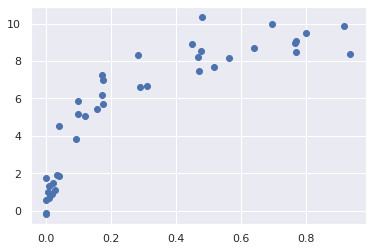

In [56]:
import seaborn; seaborn.set()  # plot formatting

plt.scatter(X.ravel(), 
            y
           )

lim = plt.axis()

y_test = PolynomialRegression(5).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), 
         y_test,
         )
plt.axis(lim);